In [1]:
import pandas as pd
import numpy as np
from functions import dataloader, add_features, data_split, scale, plot_model_comparison, plot_train_test_predictions
from functions import create_sequences, create_lstm_model, create_gru_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt


# Data Preprocessing

In [2]:
df = dataloader()
df = add_features(df)

f:\Time-Series-Forecasting\functions.py:29: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_return = df['Close'].resample('M').ffill().pct_change().shift(1)
f:\Time-Series-Forecasting\functions.py:30: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  monthly_return = monthly_return.fillna(method='bfill')


In [3]:
features = [
    'MA5', 'MA10', 'MA20', 'Momentum_1d', 
    'Momentum_5d', 'Monthly_Return', 'Open', 'High', 'Low', 'Close'
]


In [4]:
X = df[features]
y = df['target']

# Data Splitting

In [5]:
# Split data

test_size = 0.2
X_train, X_test, y_train, y_test = data_split(X, y, test_size=test_size)

# Calculate split index for plotting
split_idx = int(len(df) * (1 - test_size))



# Data Scaling

In [6]:
# Scale data

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, y_scaler = scale(X_train, X_test, y_train, y_test)

In [7]:
# Set style for plots
plt.style.use('dark_background')


model_results = {}
models = {}



In [8]:
# Get actual test prices
y_test_original = df['target'][split_idx:].values

# Machine Learning Models

In [9]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression


lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train_scaled)
lr_pred_scaled = lr_model.predict(X_test_scaled)
lr_pred = y_scaler.inverse_transform(lr_pred_scaled.reshape(-1, 1)).flatten()

# Metrics
lr_mse = mean_squared_error(y_test_scaled, lr_pred_scaled)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test_scaled, lr_pred_scaled)
lr_r2 = r2_score(y_test_scaled, lr_pred_scaled)

model_results['Linear Regression'] = {
    'MSE': lr_mse,
    'RMSE': lr_rmse,
    'MAE': lr_mae,
    'R²': lr_r2
}
models['Linear Regression'] = lr_model

print("Linear Regression Model Performance:")
for metric, value in model_results['Linear Regression'].items():
    print(f"{metric}: {value:.4f}")

Linear Regression Model Performance:
MSE: 0.0005
RMSE: 0.0212
MAE: 0.0157
R²: 0.9714



Plotting results for Linear Regression model


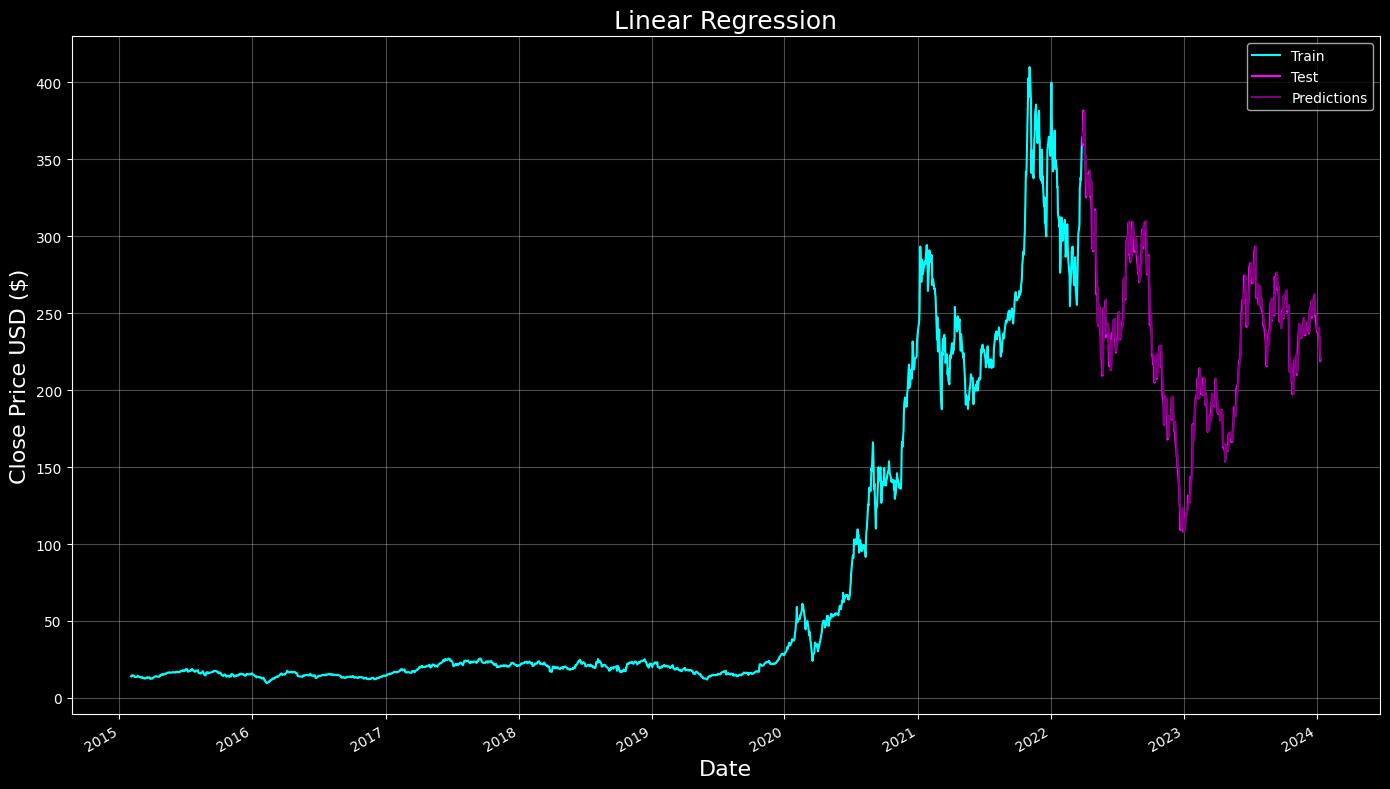

In [10]:
print(f"\nPlotting results for Linear Regression model")
plot_train_test_predictions(df, split_idx, y_test_original, lr_pred, model_name="Linear Regression")

In [11]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_scaled)
rf_pred_scaled = rf_model.predict(X_test_scaled)
rf_pred = y_scaler.inverse_transform(rf_pred_scaled.reshape(-1, 1)).flatten()

# Metrics
rf_mse = mean_squared_error(y_test_scaled, rf_pred_scaled)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test_scaled, rf_pred_scaled)
rf_r2 = r2_score(y_test_scaled, rf_pred_scaled)

model_results['Random Forest'] = {
    'MSE': rf_mse,
    'RMSE': rf_rmse,
    'MAE': rf_mae,
    'R²': rf_r2
}
models['Random Forest'] = rf_model

print("Random Forest Model Performance:")
for metric, value in model_results['Random Forest'].items():
    print(f"{metric}: {value:.4f}")

Random Forest Model Performance:
MSE: 0.0008
RMSE: 0.0291
MAE: 0.0222
R²: 0.9461



Plotting results for Random Forest model


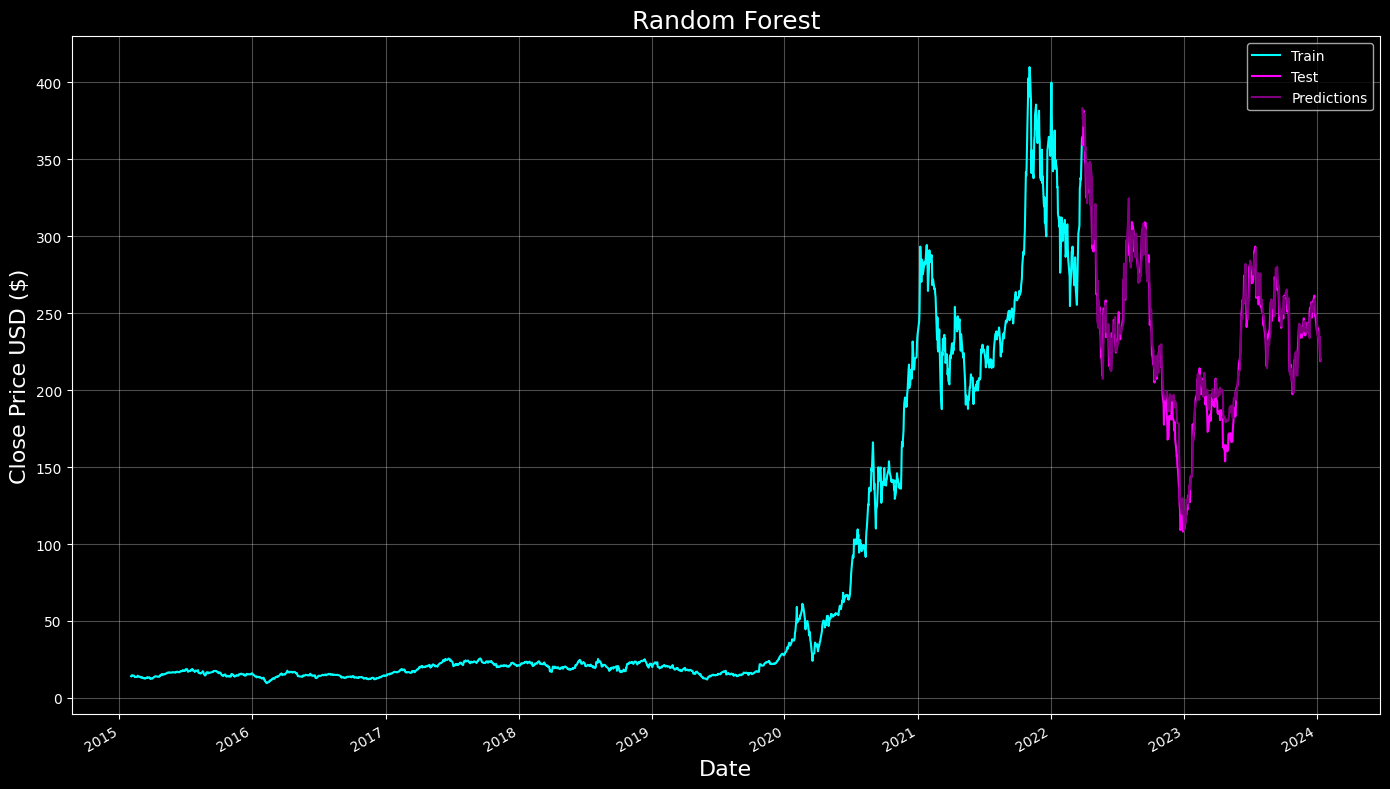

In [12]:
print(f"\nPlotting results for Random Forest model")
plot_train_test_predictions(df, split_idx, y_test_original, rf_pred, model_name="Random Forest")

In [13]:
# XGBoost Model
import xgboost as xgb


xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train_scaled)
xgb_pred_scaled = xgb_model.predict(X_test_scaled)
xgb_pred = y_scaler.inverse_transform(xgb_pred_scaled.reshape(-1, 1)).flatten()

# Metrics
xgb_mse = mean_squared_error(y_test_scaled, xgb_pred_scaled)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mae = mean_absolute_error(y_test_scaled, xgb_pred_scaled)
xgb_r2 = r2_score(y_test_scaled, xgb_pred_scaled)

model_results['XGBoost'] = {
    'MSE': xgb_mse,
    'RMSE': xgb_rmse,
    'MAE': xgb_mae,
    'R²': xgb_r2
}
models['XGBoost'] = xgb_model

print("XGBoost Model Performance:")
for metric, value in model_results['XGBoost'].items():
    print(f"{metric}: {value:.4f}")


XGBoost Model Performance:
MSE: 0.0008
RMSE: 0.0279
MAE: 0.0217
R²: 0.9505



Plotting results for XGBoost


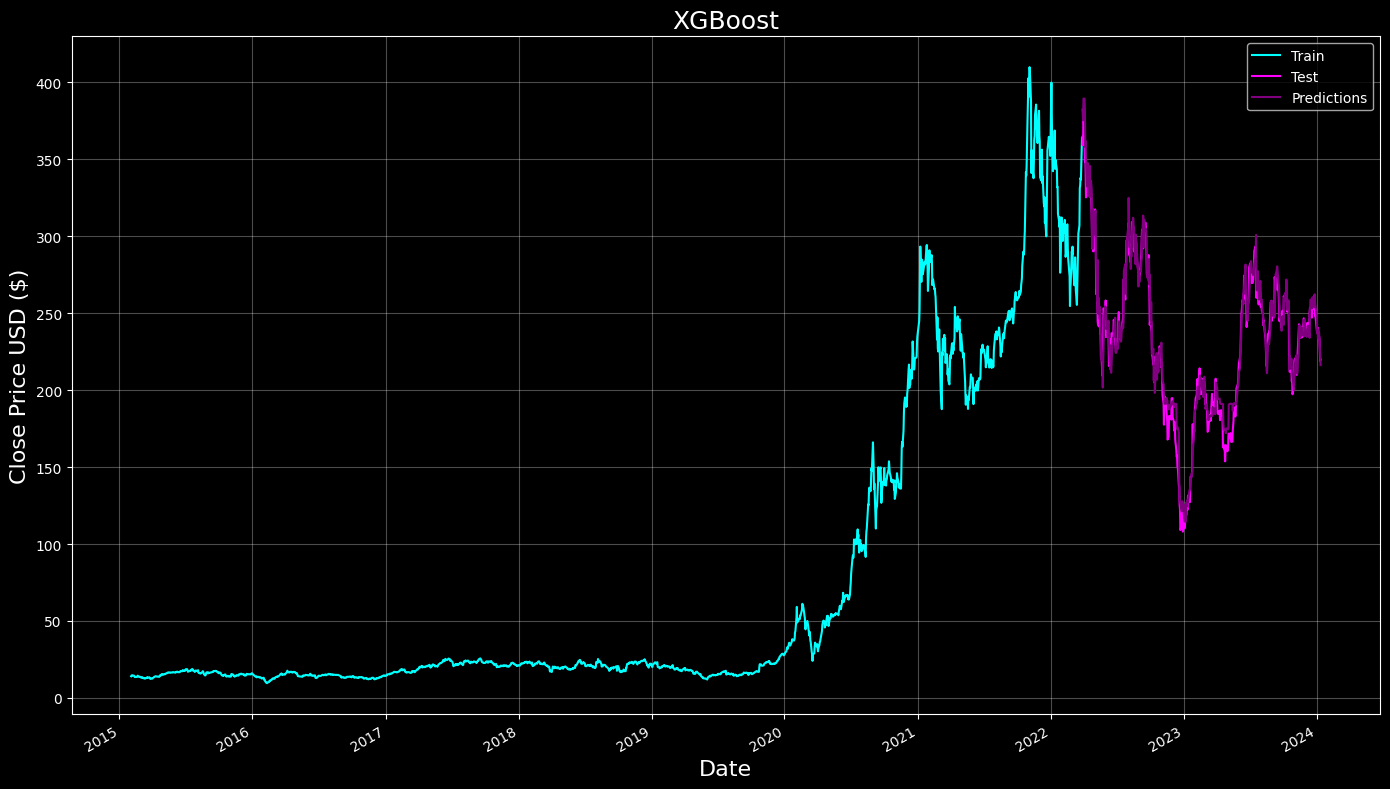

In [14]:
print(f"\nPlotting results for XGBoost")
plot_train_test_predictions(df, split_idx, y_test_original, xgb_pred, model_name="XGBoost")

In [15]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor


dt_model = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dt_model.fit(X_train_scaled, y_train_scaled)
dt_pred_scaled = dt_model.predict(X_test_scaled)
dt_pred = y_scaler.inverse_transform(dt_pred_scaled.reshape(-1, 1)).flatten()

# Metrics
dt_mse = mean_squared_error(y_test_scaled, dt_pred_scaled)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test_scaled, dt_pred_scaled)
dt_r2 = r2_score(y_test_scaled, dt_pred_scaled)

model_results['Decision Tree'] = {
    'MSE': dt_mse,
    'RMSE': dt_rmse,
    'MAE': dt_mae,
    'R²': dt_r2
}
models['Decision Tree'] = dt_model

print("Decision Tree Model Performance:")
for metric, value in model_results['Decision Tree'].items():
    print(f"{metric}: {value:.4f}")

Decision Tree Model Performance:
MSE: 0.0015
RMSE: 0.0392
MAE: 0.0290
R²: 0.9024



Plotting results for Decision Tree model


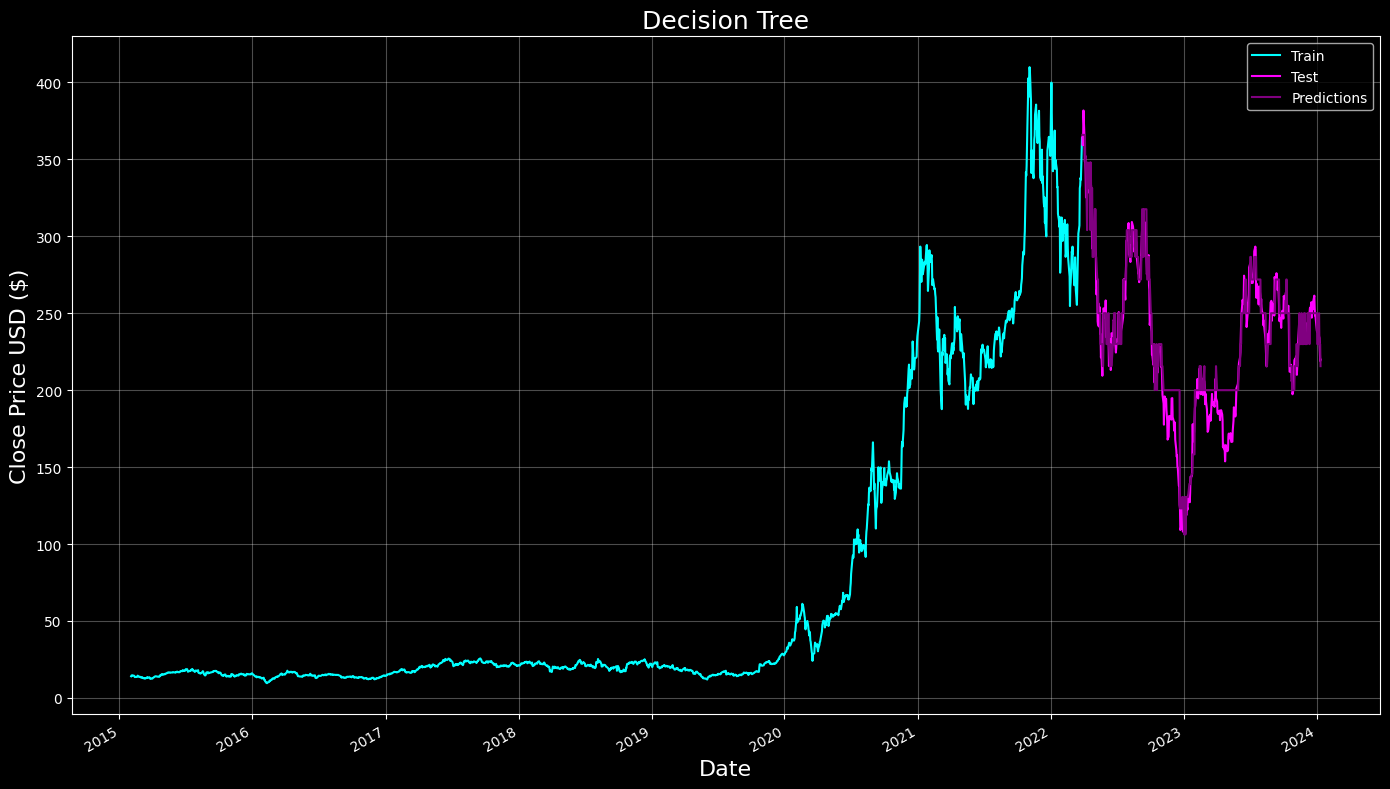

In [16]:
print(f"\nPlotting results for Decision Tree model")
plot_train_test_predictions(df, split_idx, y_test_original, dt_pred, model_name="Decision Tree")

In [17]:
# SVR Model 
from sklearn.svm import SVR


svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_model.fit(X_train_scaled, y_train_scaled)
svr_pred_scaled = svr_model.predict(X_test_scaled)
svr_pred = y_scaler.inverse_transform(svr_pred_scaled.reshape(-1, 1)).flatten()

# Metrics
svr_mse = mean_squared_error(y_test_scaled, svr_pred_scaled)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test_scaled, svr_pred_scaled)
svr_r2 = r2_score(y_test_scaled, svr_pred_scaled)

model_results['SVR'] = {
    'MSE': svr_mse,
    'RMSE': svr_rmse,
    'MAE': svr_mae,
    'R²': svr_r2
}
models['SVR'] = svr_model

print("SVR Model Performance:")
for metric, value in model_results['SVR'].items():
    print(f"{metric}: {value:.4f}")

SVR Model Performance:
MSE: 0.0014
RMSE: 0.0368
MAE: 0.0306
R²: 0.9141



Plotting results for SVR model


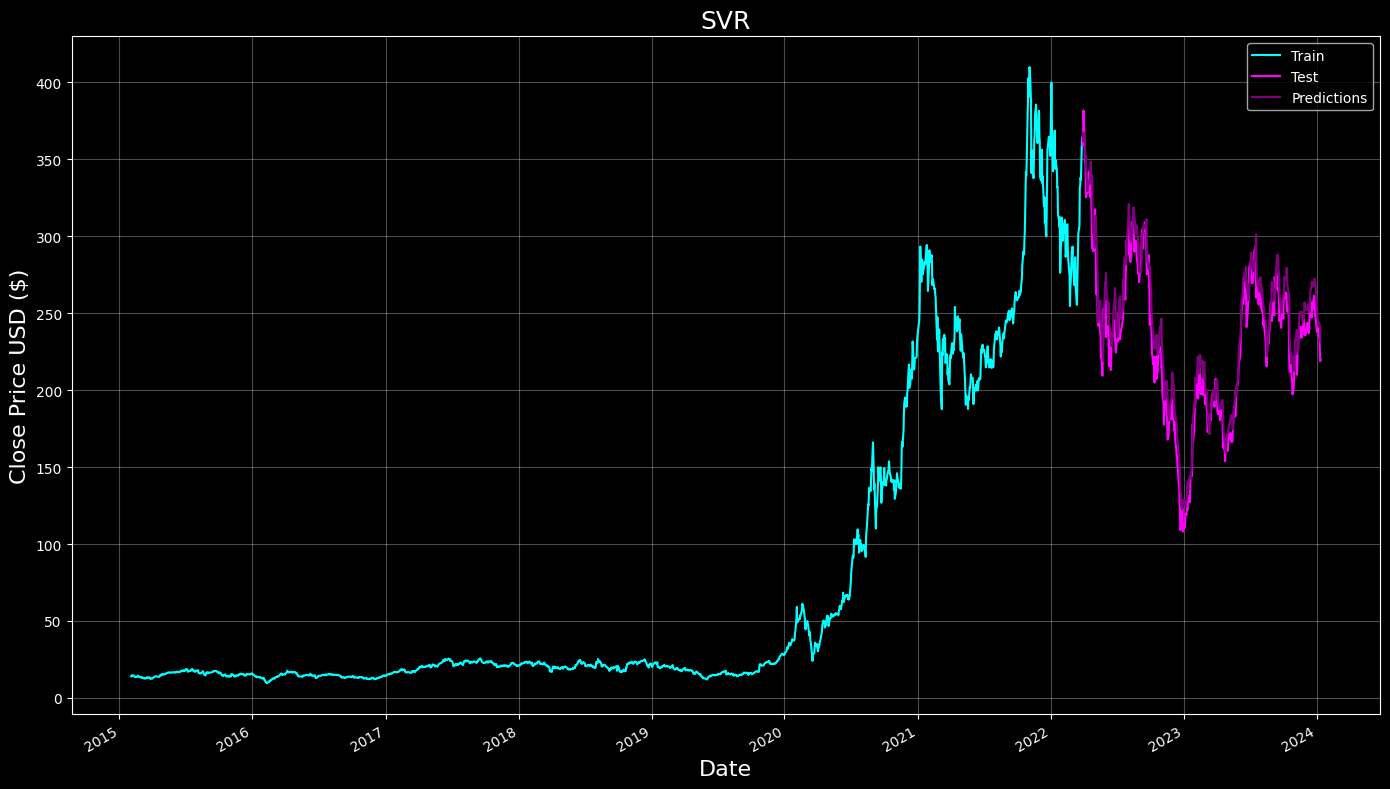

In [18]:
print(f"\nPlotting results for SVR model")
plot_train_test_predictions(df, split_idx, y_test_original, svr_pred, model_name="SVR")


Plotting model comparison...


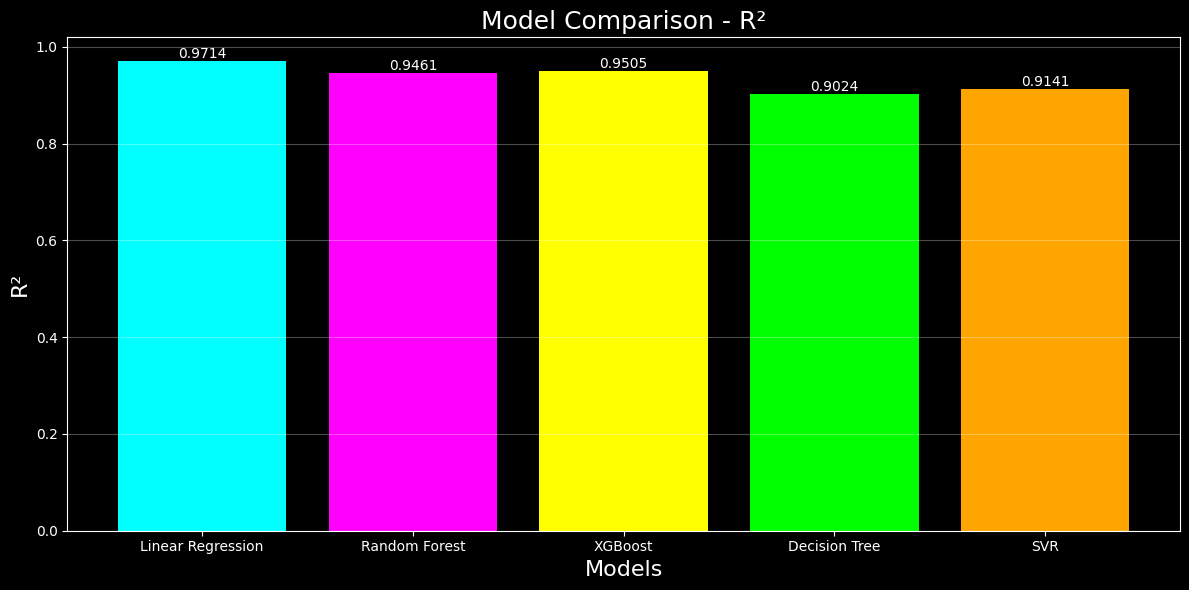

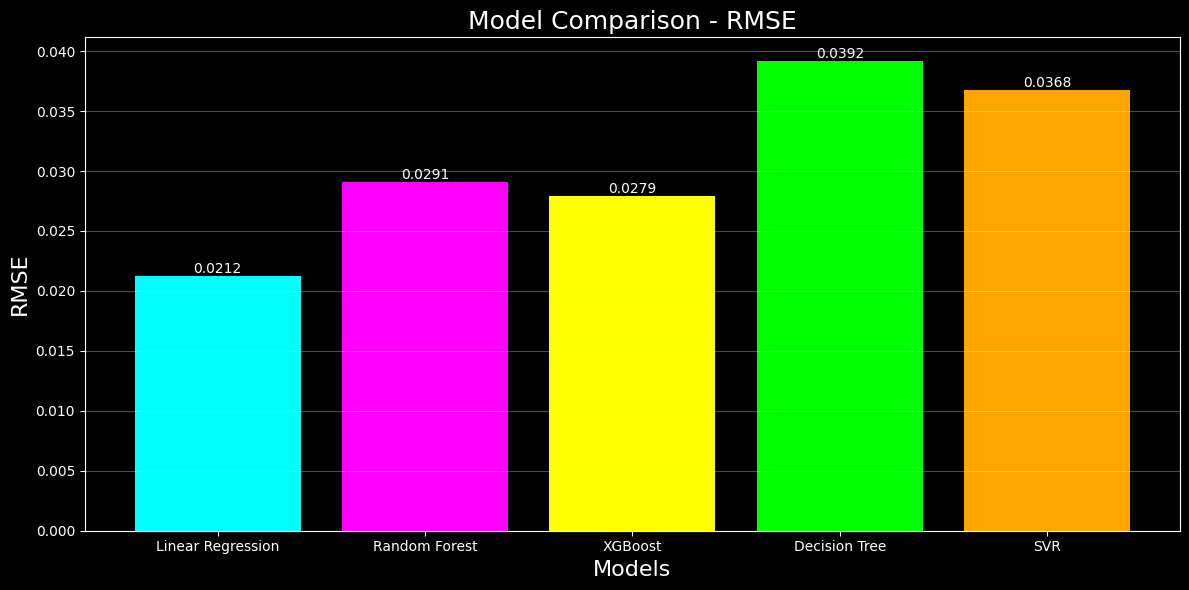

In [19]:


# Plot the model with the best R² score
best_model_name = max(model_results, key=lambda x: model_results[x]['R²'])
best_model = models[best_model_name]
best_pred_scaled = best_model.predict(X_test_scaled)
best_pred = y_scaler.inverse_transform(best_pred_scaled.reshape(-1, 1)).flatten()



# Plot model comparison
print("\nPlotting model comparison...")
plot_model_comparison(model_results)


# Deep Learning Models


Preparing data for LSTM model...

Training LSTM model...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM Model Performance:
MSE: 0.0027
RMSE: 0.0524
MAE: 0.0426
R²: 0.8025

Plotting LSTM results...


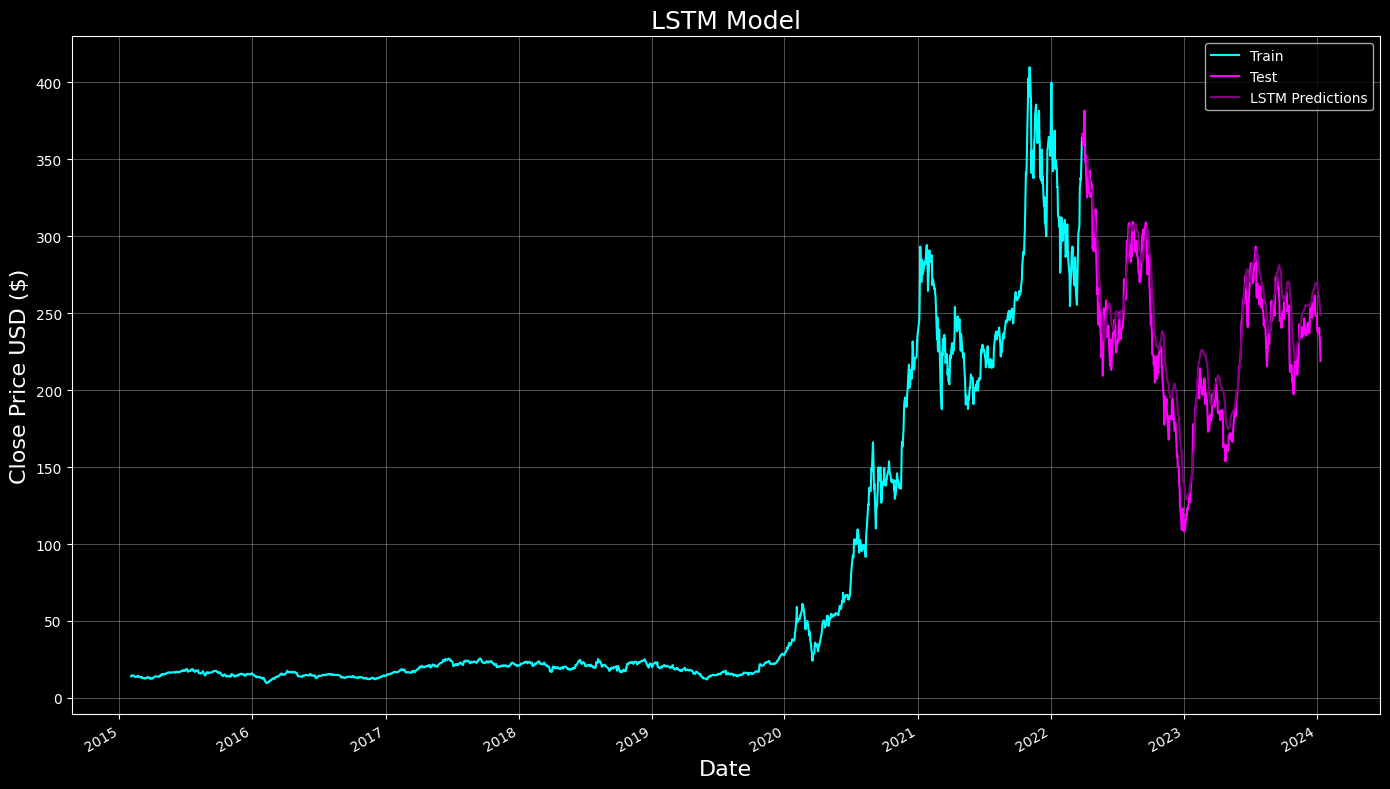

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('dark_background')

    

    
 
    
# -------------------------------------------------
# LSTM Model 
# -------------------------------------------------
print("\nPreparing data for LSTM model...")
# Create sequences for LSTM (timesteps=10)
time_steps = 10
X_train_seq, y_train_seq = create_sequences(X_train_scaled, y_train_scaled, time_steps)
X_test_seq, y_test_seq = create_sequences(X_test_scaled, y_test_scaled, time_steps)

# Reshape for LSTM [samples, time steps, features]
X_train_lstm = X_train_seq.reshape(X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2])
X_test_lstm = X_test_seq.reshape(X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2])

print("\nTraining LSTM model...")
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Create and train LSTM model
lstm_model = create_lstm_model((time_steps, X_train.shape[1]))
lstm_history = lstm_model.fit(
    X_train_lstm, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=0
)

# Make predictions
lstm_pred_seq = lstm_model.predict(X_test_lstm)
lstm_pred_scaled = lstm_pred_seq.flatten()

# Handle potential length mismatch due to sequence creation
y_test_lstm = y_test_seq

# Metrics calculation
lstm_mse = mean_squared_error(y_test_lstm, lstm_pred_scaled)
lstm_rmse = np.sqrt(lstm_mse)
lstm_mae = mean_absolute_error(y_test_lstm, lstm_pred_scaled)
lstm_r2 = r2_score(y_test_lstm, lstm_pred_scaled)

# Prepare predictions for plotting (inverse transform)
# Handle potential length mismatch for plotting
lstm_pred = y_scaler.inverse_transform(lstm_pred_scaled.reshape(-1, 1)).flatten()

# Store results
model_results['LSTM'] = {
    'MSE': lstm_mse,
    'RMSE': lstm_rmse,
    'MAE': lstm_mae,
    'R²': lstm_r2
}
models['LSTM'] = lstm_model

print("LSTM Model Performance:")
for metric, value in model_results['LSTM'].items():
    print(f"{metric}: {value:.4f}")

offset = time_steps
lstm_test_dates = df.index[split_idx+offset:split_idx+offset+len(lstm_pred)]

print("\nPlotting LSTM results...")
# plot_train_test_predictions(df, split_idx, y_test_original, lstm_pred, model_name="LSTM")
plt.figure(figsize=(14, 8))
plt.plot(df.index[:split_idx], df['Close'][:split_idx], color='cyan', label='Train')
plt.plot(df.index[split_idx:], df['Close'][split_idx:], color='magenta', label='Test')
plt.plot(lstm_test_dates, lstm_pred, color='purple', label='LSTM Predictions')
plt.title('LSTM Model', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()




Training GRU model...
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
GRU Model Performance:
MSE: 0.0021
RMSE: 0.0456
MAE: 0.0366
R²: 0.8507

Plotting GRU results...


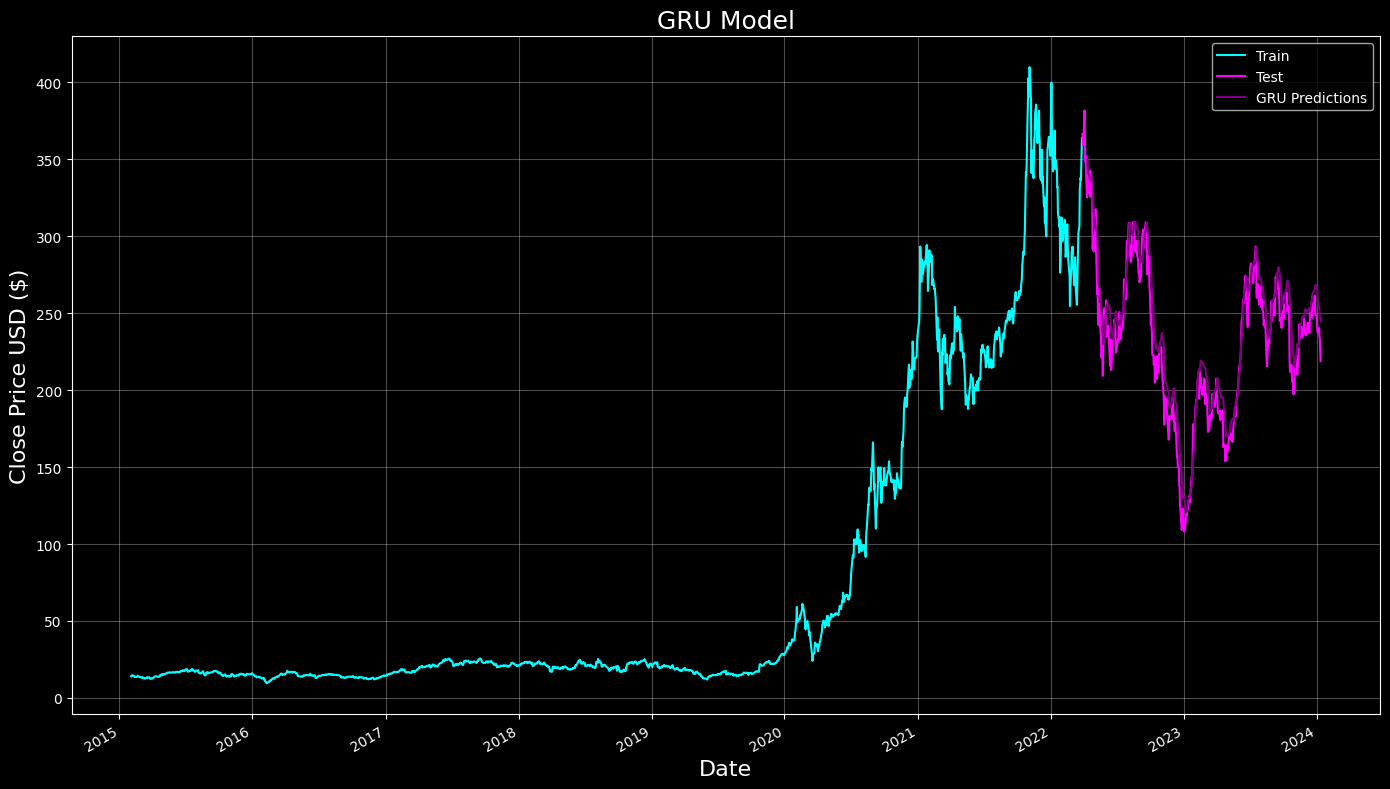

In [21]:
# -------------------------------------------------
# GRU Model 
# -------------------------------------------------
print("\nTraining GRU model...")
# Create and train GRU model
gru_model = create_gru_model((time_steps, X_train.shape[1]))
gru_history = gru_model.fit(
    X_train_lstm, y_train_seq,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stopping],
    verbose=0
)

# Make predictions
gru_pred_seq = gru_model.predict(X_test_lstm)
gru_pred_scaled = gru_pred_seq.flatten()

# Metrics calculation
gru_mse = mean_squared_error(y_test_lstm, gru_pred_scaled)
gru_rmse = np.sqrt(gru_mse)
gru_mae = mean_absolute_error(y_test_lstm, gru_pred_scaled)
gru_r2 = r2_score(y_test_lstm, gru_pred_scaled)

# Prepare predictions for plotting
gru_pred = y_scaler.inverse_transform(gru_pred_scaled.reshape(-1, 1)).flatten()

# Store results
model_results['GRU'] = {
    'MSE': gru_mse,
    'RMSE': gru_rmse,
    'MAE': gru_mae,
    'R²': gru_r2
}
models['GRU'] = gru_model

print("GRU Model Performance:")
for metric, value in model_results['GRU'].items():
    print(f"{metric}: {value:.4f}")
    
    
offset = time_steps

gru_test_dates = df.index[split_idx+offset:split_idx+offset+len(gru_pred)]
    



print("\nPlotting GRU results...")
plt.figure(figsize=(14, 8))
plt.plot(df.index[:split_idx], df['Close'][:split_idx], color='cyan', label='Train')
plt.plot(df.index[split_idx:], df['Close'][split_idx:], color='magenta', label='Test')
plt.plot(gru_test_dates, gru_pred, color='purple', label='GRU Predictions')
plt.title('GRU Model', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.gcf().autofmt_xdate()
plt.tight_layout()
plt.show()
    


# Ensemble Model

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Optimal weights: RF = 0.8857, LSTM = 0.1143
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Evaluation Metrics:

 Ensemble
   MSE: 0.0009
   RMSE: 0.0295
   MAE: 0.0225
   R²: 0.9376

 Random Forest (adjusted)
   MSE: 0.0008
   RMSE: 0.0288
   MAE: 0.0219
   R²: 0.9403

 LSTM
   MSE: 0.0027
   RMSE: 0.0524
   MAE: 0.0426
   R²: 0.8025


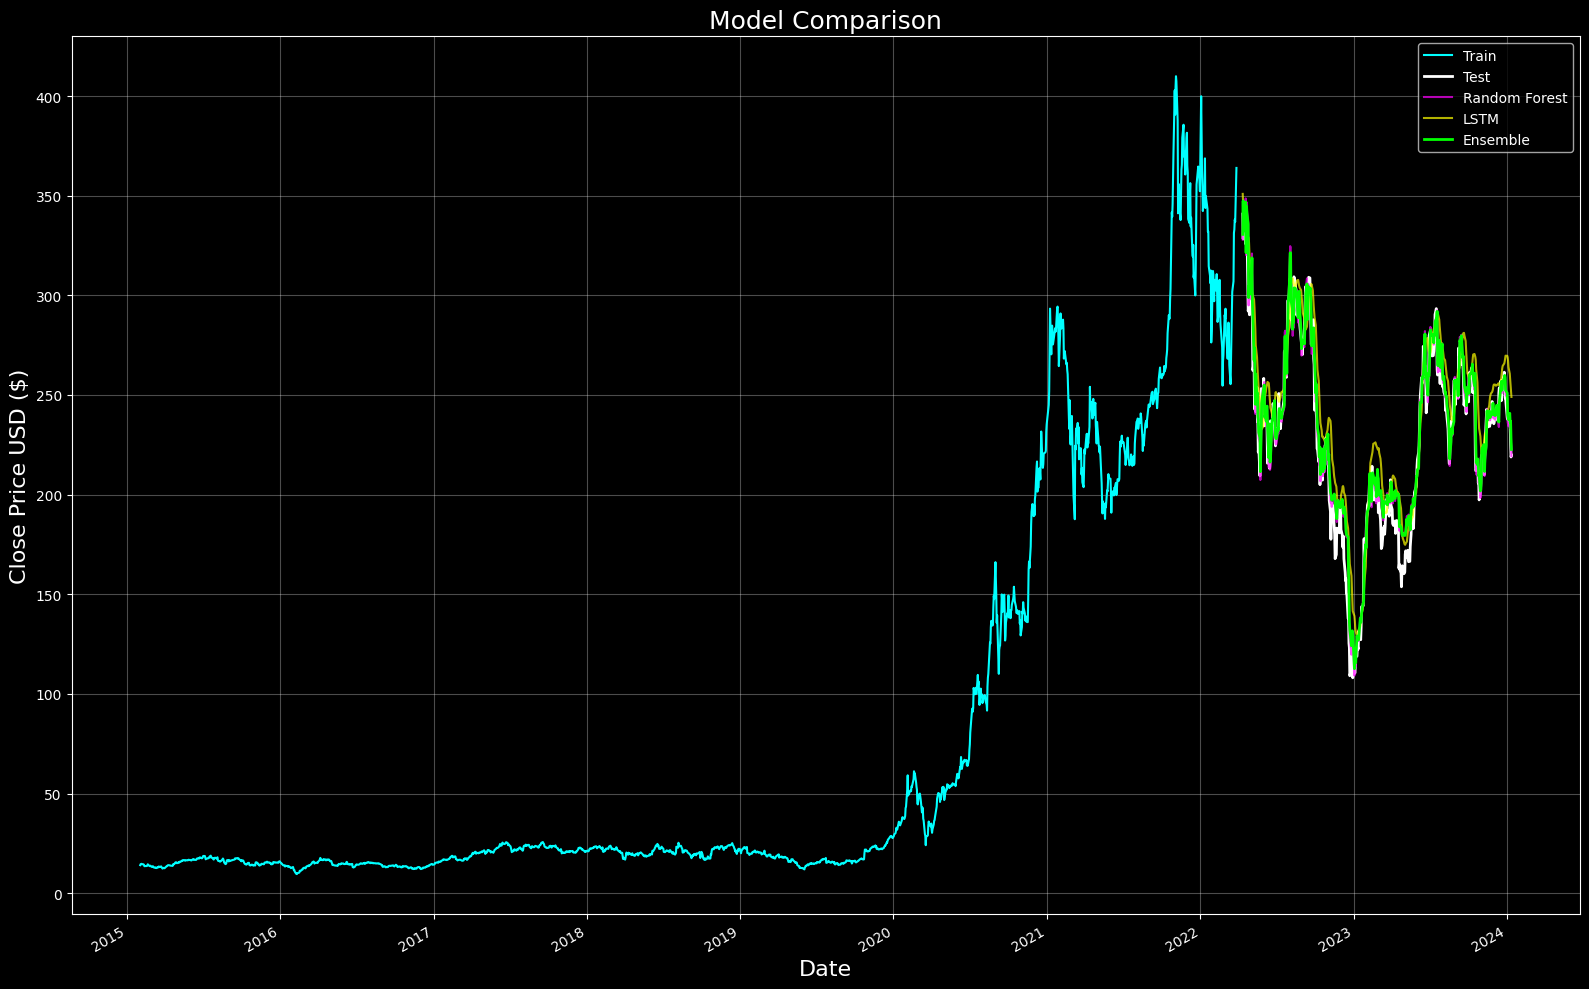

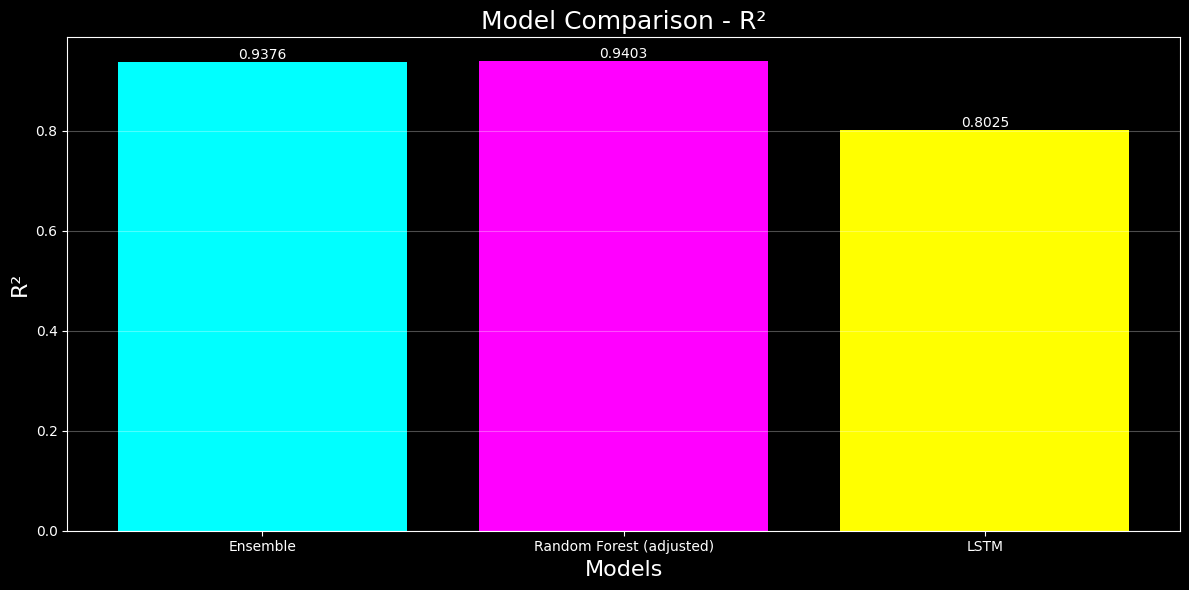

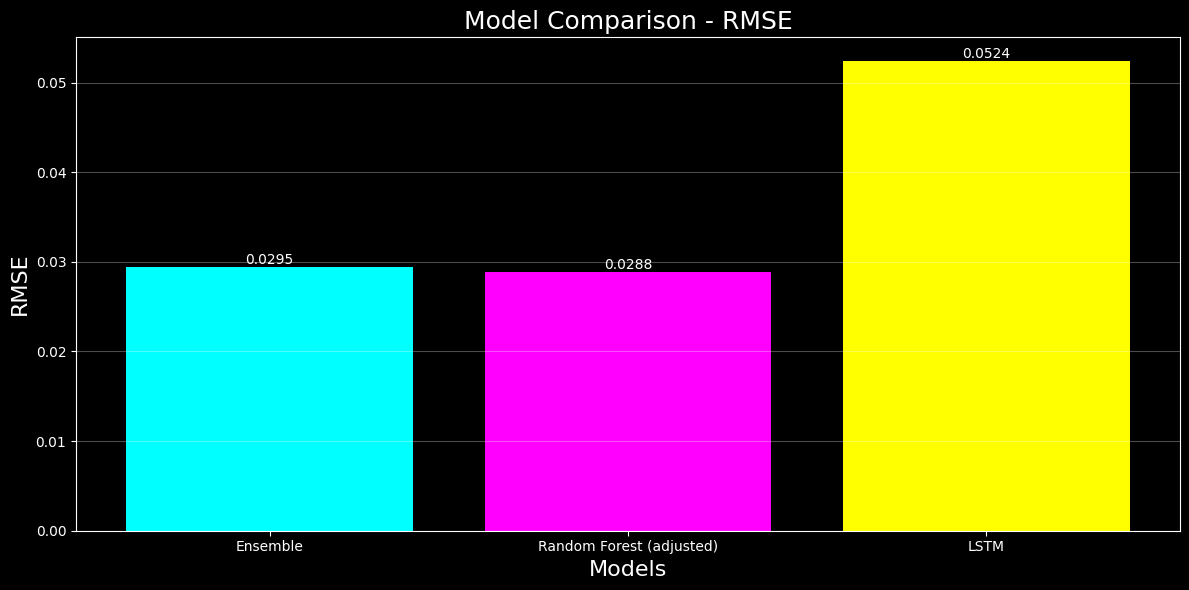

In [22]:
from functions import EnsembleModel, find_optimal_weights

optimal_weights = find_optimal_weights(
    rf_model=rf_model,
    lstm_model=lstm_model,
    X_test_scaled=X_test_scaled,
    y_test_scaled=y_test_scaled,
    time_steps=10
)

print(f"Optimal weights: RF = {optimal_weights[0]:.4f}, LSTM = {optimal_weights[1]:.4f}")

ensemble = EnsembleModel(
    rf_model=rf_model,
    lstm_model=lstm_model,
    time_steps=10,
    blend_weights=optimal_weights
)

results = ensemble.evaluate(
    X_test_scaled=X_test_scaled,
    y_test_scaled=y_test_scaled,
    y_scaler=y_scaler,
    df=df,
    split_idx=split_idx
)

# Plot model comparison metrics
plot_model_comparison(results)


